In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import torch
from torch import nn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from copy import deepcopy

In [ ]:
TEST_SIZE = 0.2
RANDOM_SEED = 42
N_POINTS=500

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

PLOT_COLORS = [
    "#1f77b4", # muted blue
    "#ff7f0e", # safety orange
    "#2ca02c", # cooked asparagus green
    "#d62728", # brick red
    "#9467bd", # muted purple
    "#8c564b", # chestnut brown
    "#e377c2", # raspberry yogurt pink
    "#7f7f7f", # middle gray
    "#bcbd22", # curry yellow-green
    "#17becf" # blue-teal
]
1
plt.rcParams['axes.facecolor'] = '#282828'
plt.rcParams['figure.facecolor'] = '#282828'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.grid'] = True

In [ ]:
def create_roof_data(n_points=N_POINTS, noise=0.05):
    x_left = np.random.uniform(-2, -0.5, size=(n_points//3))
    x_center = np.random.uniform(-0.75, 0.75, size=(n_points//3))
    x_right = np.random.uniform(0.5, 2, size=(n_points//3))

    y_left = x_left + 1.5 + np.random.normal(0, noise, size=x_left.shape)
    y_center = np.random.normal(0, noise, size=x_center.shape)
    y_right = -x_right + 1.5 + np.random.normal(0, noise, size=x_right.shape)

    x = np.concatenate([x_left, x_center, x_right])
    y = np.concatenate([y_left, y_center, y_right])

    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]

    return x, y


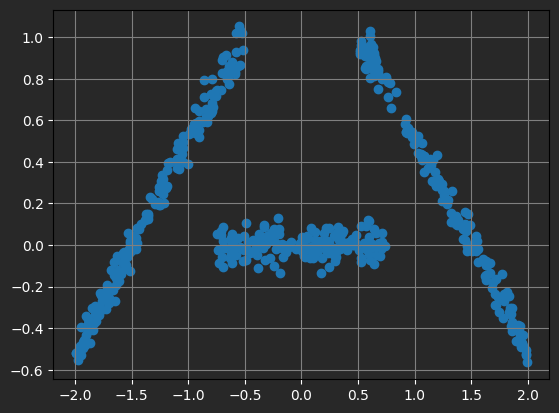

In [ ]:
plt.scatter(*create_roof_data())

In [ ]:
def create_zig_data(overlap=0, n_points=N_POINTS, noise=0.05):
    x_left = np.random.uniform(-2 + overlap/2, 0 + overlap/2, size=(n_points//2))
    x_right = np.random.uniform(0 - overlap/2, 2 - overlap/2, size=(n_points//2))

    y_left = x_left + 0.5 + np.random.normal(0, noise, size=x_left.shape)
    y_right = x_right - 0.5 + np.random.normal(0, noise, size=x_right.shape)

    x = np.concatenate([x_left, x_right])
    y = np.concatenate([y_left, y_right])

    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]

    return x, y

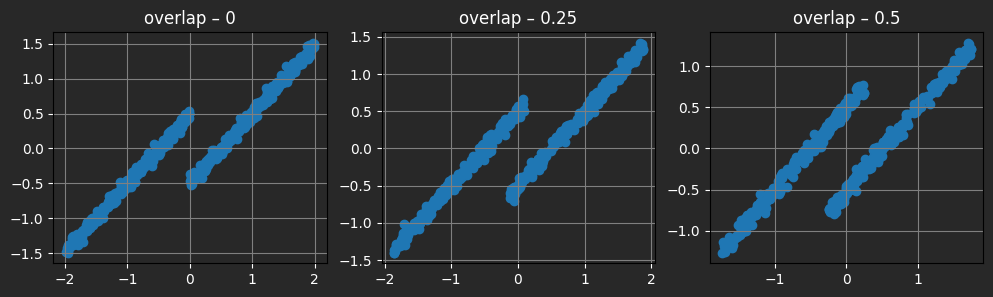

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for ax, scale in zip(axs, [0, 0.25, 0.5]):
  ax.set_title(f'overlap – {scale}')
  ax.scatter(*create_zig_data(scale))

In [ ]:
def create_linear_data(n_points=N_POINTS, noise=0.05):
    x = np.random.uniform(-2, 2, size=(n_points))
    y = x + np.random.normal(0, noise, size=x.shape)

    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]

    return x, y

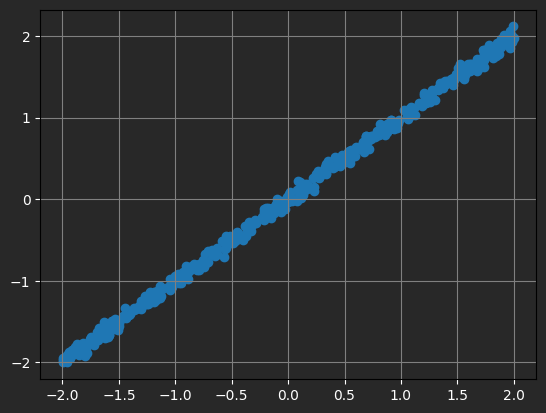

In [ ]:
plt.scatter(*create_linear_data())

In [ ]:
def train_and_plot_all_data(model, more_fns = []):

    init_model = deepcopy(model)

    # datasets = [create_roof_data(), create_zig_data(overlap=0.5), create_zig_data(overlap=-0.5)]
    datasets = [create_roof_data(), create_zig_data(overlap=0.5)]

    if more_fns:
      fig, axs = plt.subplots(1+len(more_fns),len(datasets), figsize=(len(datasets)*7, 4*(1+len(more_fns))))
    else:
      fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*7, 4))

    plot_axs = axs[0, :] if more_fns else axs
    for i, (ax, dataset) in enumerate(list(zip(plot_axs, datasets))):

        model = deepcopy(init_model)

        x, y = dataset
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)

        model.fit(x_train, y_train)

        predictions = model.predict(x_test)

        mse = mean_squared_error(predictions, y_test)

        x_plot, y_plot, labels = model.plot()

        ax.set_title(f"{model.name} with Test MSE: {round(mse, 4)}")
        ax.scatter(x, y, label="Data", color='white')  # Assigning label for scatter points


        line_width = 3
        if isinstance(x_plot[0], (list, np.ndarray)):
            assert len(x_plot) == len(y_plot) == len(labels)
            for x_line, y_line, label, color in zip(x_plot, y_plot, labels, PLOT_COLORS):
                ax.plot(x_line, y_line, label=label, lw=line_width, color=color)  # Thicker line
        else:
            ax.plot(x_plot, y_plot, label=labels[0], lw=line_width, color=PLOT_COLORS[0])  # Thicker line

        ax.legend()  # This adds a legend for each individual subplot

        if more_fns:
          for j, fn in enumerate(more_fns):
            single_plot_axs = axs[j+1, i]
            fn(model, single_plot_axs)

    plt.tight_layout()
    plt.show()

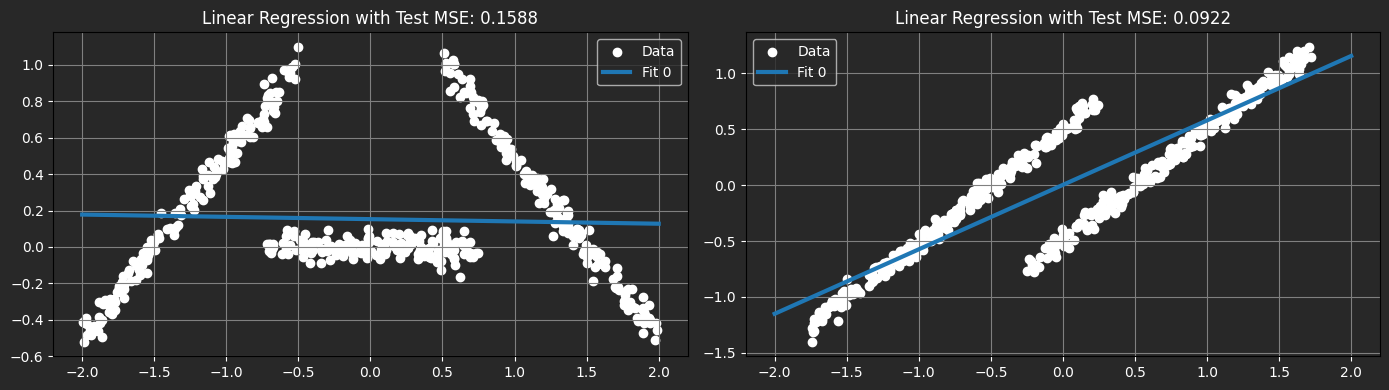

In [ ]:
class LinearRegressor:
    def __init__(self):
        self.model = LinearRegression()
        self.name = "Linear Regression"

    def fit(self, x, y):
        self.model.fit(np.expand_dims(x, axis=1), y)

    def predict(self, x):
        return self.model.predict(np.expand_dims(x, axis=1))

    def plot(self):
        x = np.array([-2, 2])
        y = self.model.predict(np.expand_dims(x, axis=1))

        #return as array because some models will return a set of lines
        return (x), (y), ['Fit 0']

    def __str__(self):
        return self.name

linear_regressor = LinearRegressor()
train_and_plot_all_data(linear_regressor)

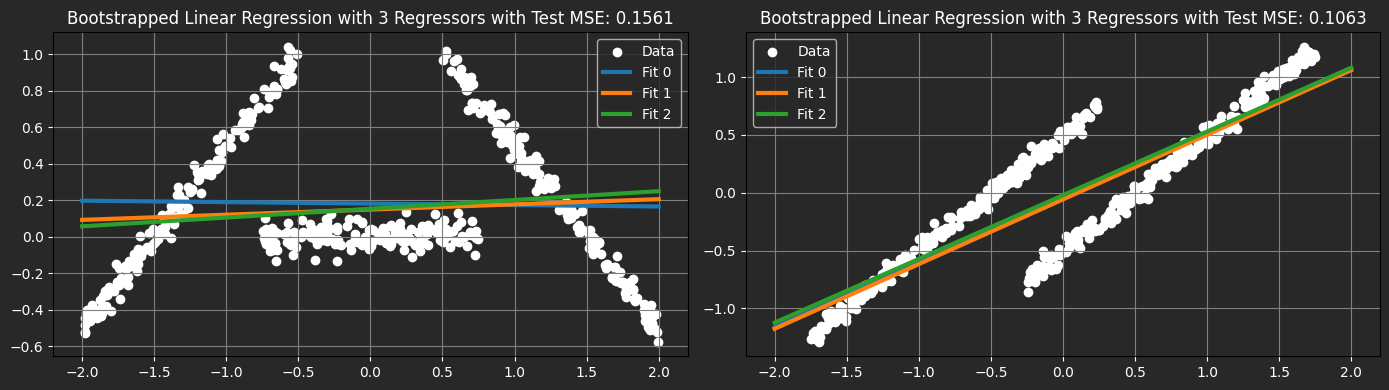

In [ ]:
class BootstrapLinearRegressor:
    def __init__(self, n_regressors=3):
        self.models = [LinearRegression() for _ in range(n_regressors)]
        self.name = f"Bootstrapped Linear Regression with {n_regressors} Regressors"
        self.n_regressors = n_regressors

    def fit(self, x, y):
        for i in range(self.n_regressors):
            idxs = np.random.randint(0, x.shape[0], x.shape[0])
            self.models[i].fit(np.expand_dims(x[idxs], axis=1), y[idxs])

    def predict(self, x):
        predictions_array = np.concatenate([np.expand_dims(self.models[i].predict(np.expand_dims(x, axis=1)), axis=1) for i in range(self.n_regressors)], axis=1)

        return np.mean(predictions_array, axis=1)

    def plot(self):
        xs = []
        ys = []
        labels = []

        for i, model in enumerate(self.models):
            x = np.array([-2, 2])
            xs.append(x)
            ys.append(model.predict(np.expand_dims(x, axis=1)))
            labels.append(f"Fit {i}")

        return xs, ys, labels

    def __str__(self):
        return self.name

train_and_plot_all_data(BootstrapLinearRegressor())

In [ ]:
def line_plot_with_markers(x_data_list, y_data_list, title="", labels=None, xlabel="", ylabel="", markers=None):

    assert len(x_data_list) == len(y_data_list)

    if labels:
      assert len(labels) == len(x_data_list)

    if not markers:
        markers = [''] * len(x_data_list)  # Default: No markers

    # Create a new figure and axes here
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (x_data, y_data) in enumerate(zip(x_data_list, y_data_list)):
        label = labels[i] if labels else None
        ax.plot(x_data, y_data, marker=markers[i], label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if labels:
        ax.legend()

    ax.grid(True)
    fig.tight_layout()
    plt.show()

class MixtureOfLinearExpertsConditionalModel(nn.Module):
    def __init__(self, n_experts=3):
        super().__init__()
        self.linear1 = nn.Linear(1, n_experts)
        self.linear2 = nn.Linear(1, n_experts)
        self.temperature = 1

    def forward(self, x):
        u = self.linear1(x)
        y = torch.sum(torch.mul(u, self.forward_weighting(x)), dim=1)
        return y

    def forward_weighting(self, x):
        z = self.linear2(x)
        v = nn.Softmax(dim=1)(z / self.temperature)
        return v

class LinearFunction():
    def __init__(self, m, b):
        self.m = m
        self.b = b

    def predict(self, x):
        return self.m * x + self.b

class MixtureOfLinearExpertsConditionalSGD():
    def __init__(self, model, n_experts=3, temp_decay=1, epochs=1000, lr=1e-2):
        self.model = model
        self.name = f"MoE Conditional SGD with {n_experts} Experts"
        self.n_experts = n_experts
        self.loss_fn = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        self.losses = []
        self.temp_decay = temp_decay
        self.train_epochs = epochs

    def fit(self, x, y, batch_size=512):
      dataset = torch.utils.data.TensorDataset(torch.from_numpy(np.expand_dims(x, axis=1)).float(), torch.tensor(y).float())
      dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

      losses = []

      pbar = tqdm(range(self.train_epochs))  # Create a tqdm object
      for epoch in pbar:
          epoch_losses = []  # List to store losses for this epoch

          for batch_x, batch_y in dataloader:
              self.optimizer.zero_grad()
              y_pred = self.model(batch_x)
              loss = self.loss_fn(y_pred, batch_y)
              loss.backward()
              self.optimizer.step()
              epoch_losses.append(loss.item())

          avg_loss = np.mean(epoch_losses)  # Average loss for this epoch
          losses.append(avg_loss)

          self.model.temperature *= self.temp_decay

            # Update tqdm description with avg_loss and model's temperature
          pbar.set_description(f"Epoch {epoch+1}/{self.train_epochs} - Loss: {avg_loss:.4f} - Temp: {self.model.temperature:.4f}")

      self.losses.extend(losses)

    def predict(self, x):
      ret = self.model(torch.from_numpy(np.expand_dims(x, axis=1)).float()).detach().numpy()
      return ret

    def plot(self):
        params = {}
        for name, param in self.model.named_parameters():
            params[name] = np.ravel(param.data.numpy())

        linear_experts = []
        for i in range(self.n_experts):
            linear_experts.append(LinearFunction(params[f"linear1.weight"][i], params[f"linear1.bias"][i]))

        xs = []
        ys = []
        labels = []

        for i, linear_expert in enumerate(linear_experts):
            x = np.array([-2, 2])
            xs.append(x)
            ys.append(linear_expert.predict(x))
            labels.append(f"Expert {i} Fit")

        xs.append(np.linspace(-2, 2, 100))
        ys.append(self.model.forward(torch.from_numpy(np.expand_dims(np.linspace(-2, 2, 100), axis=1)).float()).detach().numpy())
        labels.append(f"Model Prediction")


        return xs, ys, labels

    def __str__(self):
        return self.name

Epoch 1000/1000 - Loss: 0.0821 - Temp: 1.0000: 100%|██████████| 1000/1000 [00:07<00:00, 127.16it/s]


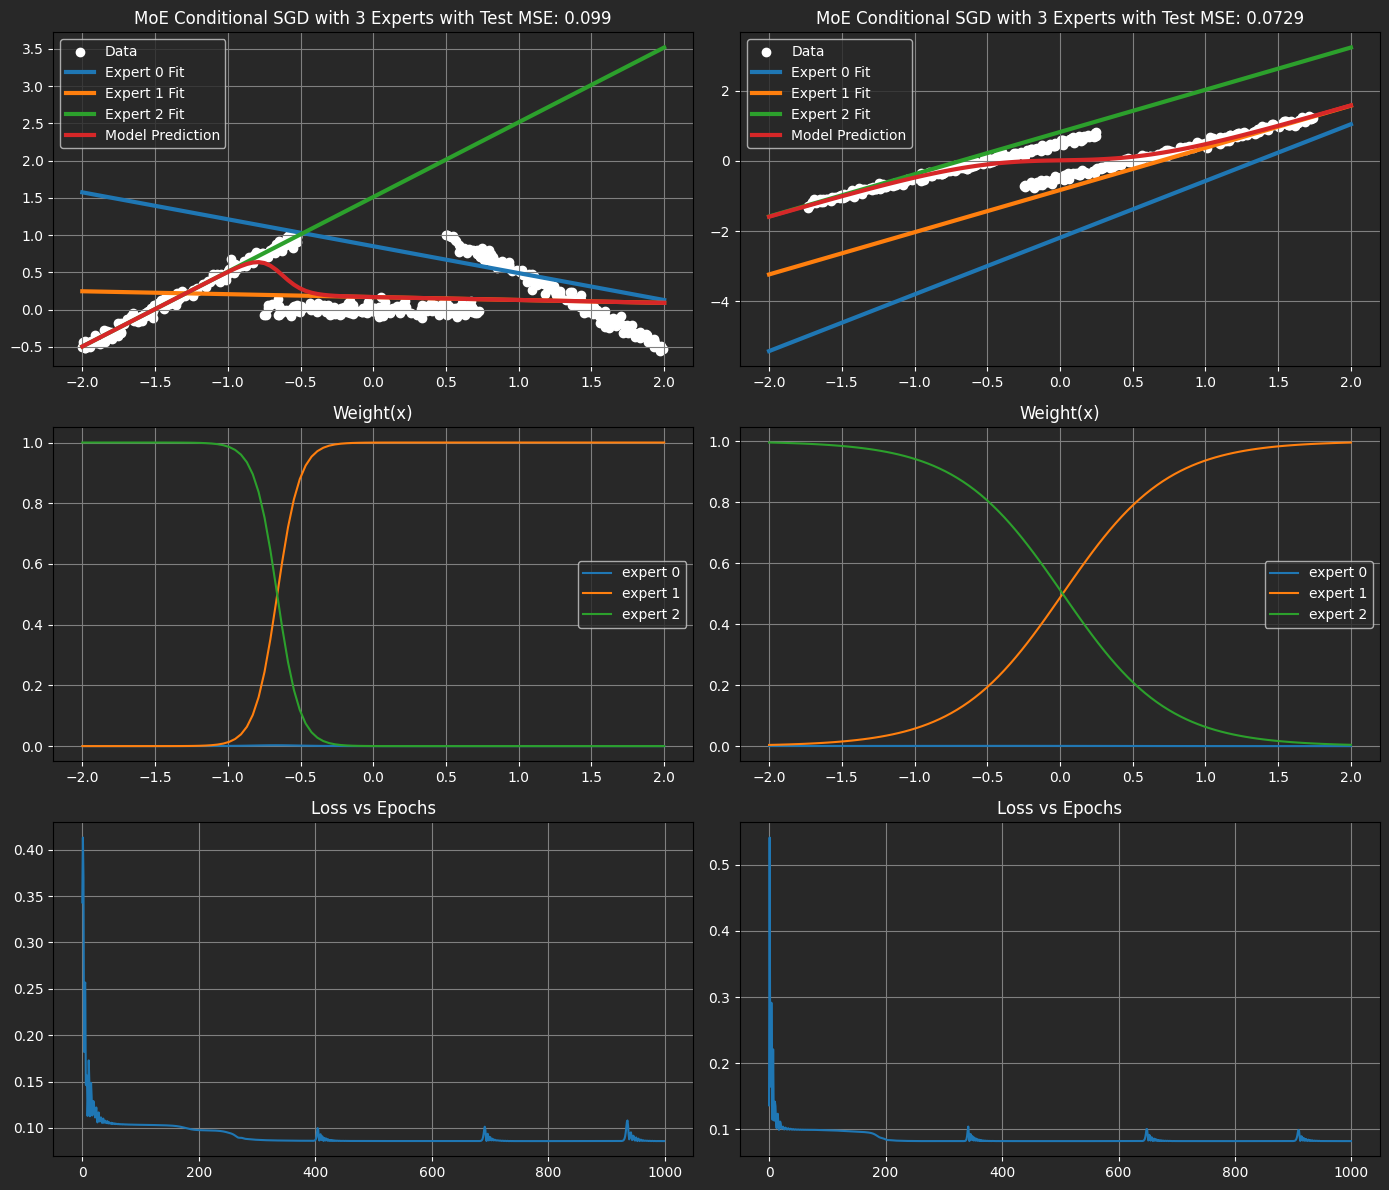

In [ ]:

def loss_plotter(model, ax):
  assert model.losses
  ax.plot(model.losses)
  ax.set_title('Loss vs Epochs')

def weight_plotter(model, ax):
    x_weight = np.linspace(-2, 2, 100)
    y_weight = model.model.forward_weighting(torch.from_numpy(np.expand_dims(x_weight, axis=1)).float()).detach().numpy()

    weights = [y_weight[:, i] for i in range(model.n_experts)]
    for expert_idx, weight in enumerate(weights):
      ax.plot(x_weight, weight, label=f'expert {expert_idx}')

    ax.set_title('Weight(x)')
    ax.legend()

moe_linear_sgd = MixtureOfLinearExpertsConditionalSGD(model=MixtureOfLinearExpertsConditionalModel(), lr=5e-1)
train_and_plot_all_data(moe_linear_sgd, more_fns = [weight_plotter, loss_plotter])

# With temperature

Epoch 2000/2000 - Loss: 0.0746 - Temp: 0.1352: 100%|██████████| 2000/2000 [00:15<00:00, 130.03it/s]


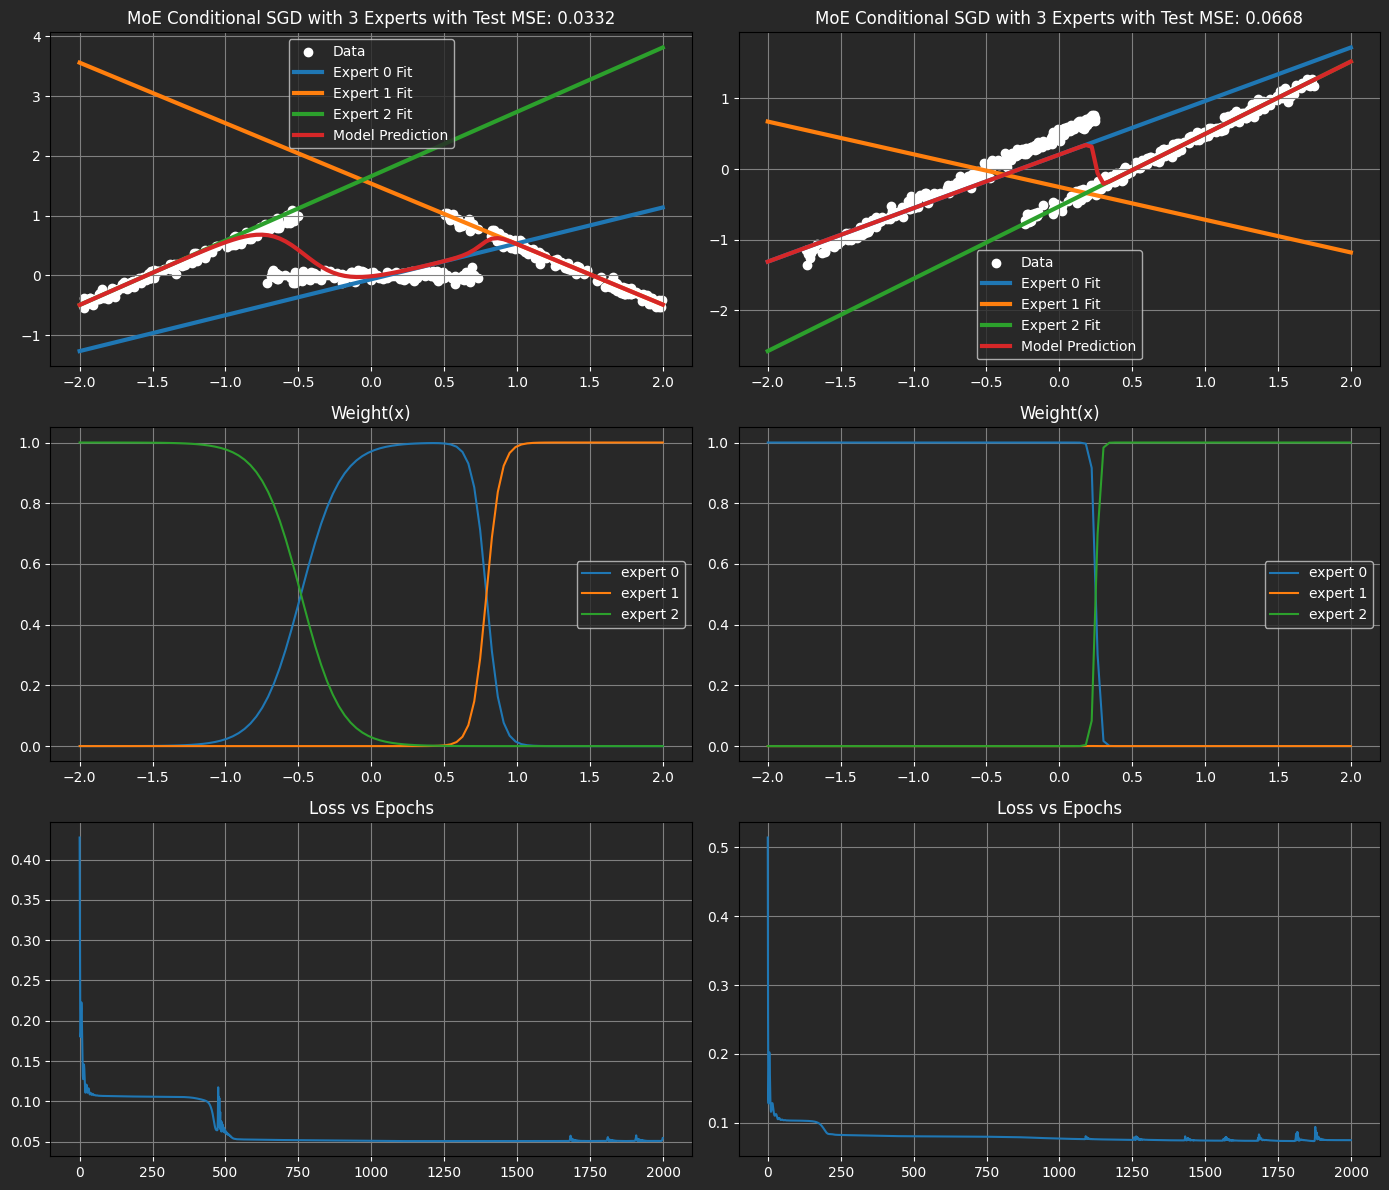

In [ ]:
moe_linear_sgd = MixtureOfLinearExpertsConditionalSGD(model=MixtureOfLinearExpertsConditionalModel(), temp_decay=0.999, epochs=2000, lr=1e-1) #try more epochs for better results
train_and_plot_all_data(moe_linear_sgd, more_fns = [weight_plotter, loss_plotter])

# What if our linear regressor could only predict using one expert at a time? (even at train time) – enter Gumbel Softmax

Epoch 3000/3000 - Loss: 0.0949 - Temp: 0.0497: 100%|██████████| 3000/3000 [00:23<00:00, 128.27it/s]


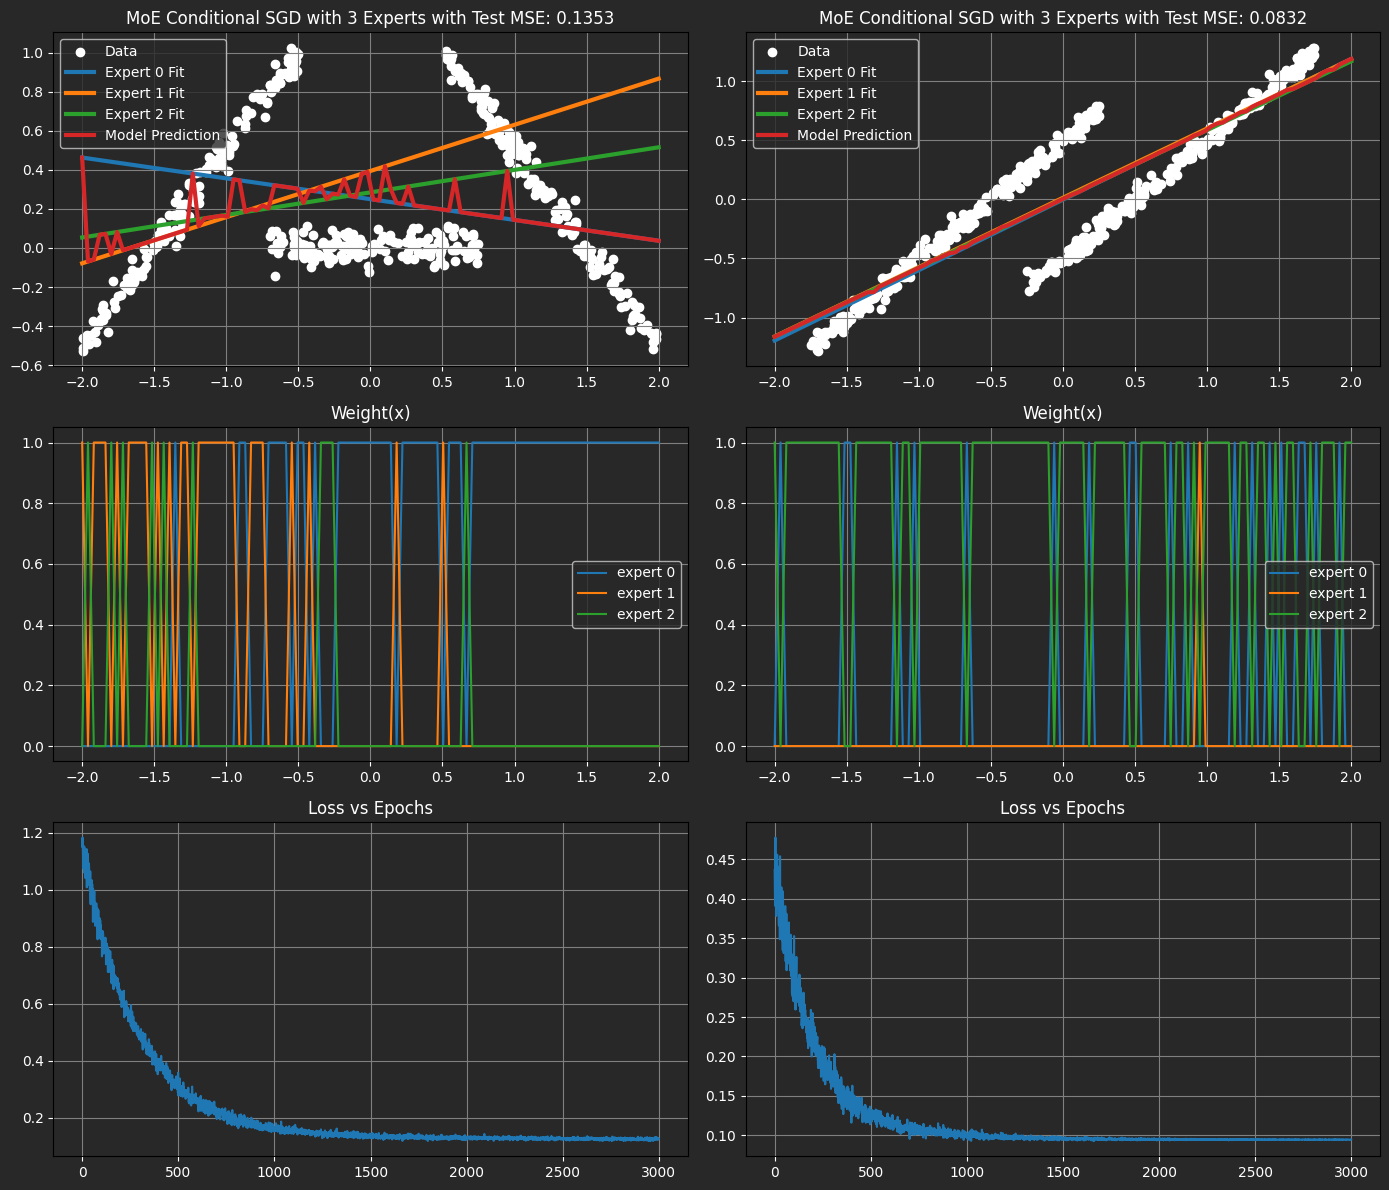

In [ ]:
class MixtureOfLinearExpertsConditionalModelGumbel(nn.Module):
    def __init__(self, n_experts=3):
        super().__init__()
        self.linear1 = nn.Linear(1, n_experts)
        self.linear2 = nn.Linear(1, n_experts)
        self.temperature = 1

    def forward(self, x):
        u = self.linear1(x)
        y = torch.sum(torch.mul(u, self.forward_weighting(x)), dim=1)
        return y

    def forward_weighting(self, x):
        z = self.linear2(x)
        v = nn.functional.gumbel_softmax(z, tau=self.temperature, hard=True)
        return v

class LinearFunction():
    def __init__(self, m, b):
        self.m = m
        self.b = b

    def predict(self, x):
        return self.m * x + self.b

moe_linear_sgd = MixtureOfLinearExpertsConditionalSGD(model=MixtureOfLinearExpertsConditionalModelGumbel(), temp_decay=0.999, epochs=3000, lr=1e-3) #try more epochs for better results
train_and_plot_all_data(moe_linear_sgd, more_fns = [weight_plotter, loss_plotter])

Expectation Step – Calculate responsibility of each expert for each point
$$ \gamma_{nk}^{(t)} = \frac{\pi_k^{(t)} p(y_n | \theta^{(t)}_k)}{\sum_{i=0}^K
 \pi_i^{(t)} p(y_n | \theta^{(t)}_i) }$$

Maximization Step –

In [ ]:
class MixtureOfLinearExpertsNotConditional:
    def __init__(self, n_experts=3, iterations=10, n_inputs = 2):


        self.pi = np.random.standard_normal(size=(n_experts))
        self.w = np.random.standard_normal(size=(n_experts, 2))
        self.beta = np.random.standard_normal()
        self.name = f"Mixture of Linear Experts Not Conditional with {n_experts} Experts"
        self.n_experts = n_experts
        self.iterations = iterations


        self.V = np.random.randn((n_experts, n_inputs))
        self.weight = np.random.randn((n_experts, n_inputs))
        self.bias = np.random.randn((n_experts, 1))

    def fit(self, x, y):

        x = np.expand_dims()
        #V is 2 x 3
        #want q to be N, 3
        #x is N x 2


        # === E STEP ===
        q = torch.nn.functional.softmax(x @ self.V)

        # === M STEP ===

        print(q)

    def predict(self, x):
        x_lift = np.concatenate([np.expand_dims(x, axis=1), np.ones((x.shape[0], 1))], axis=1)
        return np.sum(((x_lift @ self.w.T) *  self.pi.reshape(1, -1)), axis=1)

    def plot(self):
        xs = []
        ys = []
        labels = []
        for i, model in enumerate(self.models):
            x = np.array([-2, 2])
            xs.append(x)
            ys.append(model.predict(np.expand_dims(x, axis=1)))
            labels.append(f"Fit {i}")
        return xs, ys, labels

    def __str__(self):
        return self.name

In [ ]:
moe_em = MixtureOfLinearExpertsNotConditional()
train_and_plot_all_data(moe_em)

TypeError: ignored